In [24]:
import requests
import pandas as pd
import numpy as np
import matplotlib 
import datetime
from dotenv import load_dotenv
import os

# Load Environment Variables
load_dotenv()
FB_API_TOKEN = os.environ.get("API_TOKEN")

# script variables
matchweek = 23
pd.set_option("display.max_rows", None, "display.max_columns", None)


In [25]:
ds = datetime.datetime.now().strftime("%Y-%m-%d")

In [26]:
pd.options.display.max_columns=None

In [27]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

In [28]:
r = requests.get(url)

In [29]:
json = r.json()

In [30]:
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [31]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])
events_df = pd.DataFrame(json['events'])
phases_df = pd.DataFrame(json['phases'])

In [32]:
# games_df = pd.DataFrame(json['game_settings'])
# players = pd.DataFrame(json['total_players'])
events_df.head()

,id,name,deadline_time,average_entry_score,finished,data_checked,highest_scoring_entry,deadline_time_epoch,deadline_time_game_offset,highest_score,is_previous,is_current,is_next,cup_leagues_created,h2h_ko_matches_created,chip_plays,most_selected,most_transferred_in,top_element,top_element_info,transfers_made,most_captained,most_vice_captained
0,1,Gameweek 1,2022-08-05T17:30:00Z,57,True,True,7309963.0,1659720600,0,119.0,False,False,False,False,False,"[{'chip_name': 'bboost', 'num_played': 170273}...",28.0,105.0,366.0,"{'id': 366, 'points': 15}",0,283.0,318.0
1,2,Gameweek 2,2022-08-13T10:00:00Z,57,True,True,3977474.0,1660384800,0,139.0,False,False,False,False,False,"[{'chip_name': 'bboost', 'num_played': 136909}...",28.0,318.0,28.0,"{'id': 28, 'points': 19}",12847501,318.0,283.0
2,3,Gameweek 3,2022-08-20T10:00:00Z,48,True,True,9105261.0,1660989600,0,118.0,False,False,False,False,False,"[{'chip_name': 'bboost', 'num_played': 118152}...",28.0,19.0,7.0,"{'id': 7, 'points': 16}",20175060,28.0,318.0
3,4,Gameweek 4,2022-08-27T10:00:00Z,62,True,True,9406675.0,1661594400,0,149.0,False,False,False,False,False,"[{'chip_name': 'bboost', 'num_played': 145393}...",28.0,225.0,279.0,"{'id': 279, 'points': 22}",16105042,283.0,28.0
4,5,Gameweek 5,2022-08-30T17:00:00Z,62,True,True,2109803.0,1661878800,0,124.0,False,False,False,False,False,"[{'chip_name': 'bboost', 'num_played': 92307},...",28.0,104.0,318.0,"{'id': 318, 'points': 17}",14741619,318.0,28.0


In [33]:
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text,expected_goals_per_90,saves_per_90,expected_assists_per_90,expected_goal_involvements_per_90,expected_goals_conceded_per_90,goals_conceded_per_90,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
0,NaN,NaN,84450,0,0,-1,1,1,3,2.8,4.6,3,Granit,1.8,3,False,,None,49,84450.jpg,3.8,Xhaka,2.8,False,None,a,1,3,90,842267,531,723222,2151,0.4,18.4,Xhaka,2036,3,5,9,23,0,0,0,3,0,0,7,392,443.2,518.5,340.0,130.3,24,2.20,3.03,5.23,22.39,52,21,19,15,64,42,30,21,NaN,,3.0,,NaN,,0.10,0.0,0.13,0.23,0.99,1.02,232,132,190,83,75,32,111,37,1.06,0.40
1,0.0,0.0,153256,0,0,-4,4,1,3,0.0,0.0,0,Mohamed,0.0,4,False,Knee injury - Unknown return date,2023-01-26T10:00:07.778526Z,41,153256.jpg,1.2,Elneny,0.6,False,None,i,1,3,6,198001,108,268812,464,0.0,1.5,Elneny,111,0,0,0,2,0,0,0,0,0,0,0,27,4.6,5.4,0.0,1.1,1,0.00,0.04,0.04,1.29,479,219,430,212,555,224,481,223,NaN,,NaN,,NaN,,0.00,0.0,0.03,0.03,1.05,1.62,624,321,495,177,407,178,231,72,0.81,0.00
2,NaN,NaN,156074,0,0,-3,3,0,2,1.2,1.4,0,Rob,0.2,5,False,,None,42,156074.jpg,1.0,Holding,0.1,False,None,a,1,3,7,7073,19,18225,29,0.0,1.7,Holding,17,0,0,0,0,0,0,0,0,0,0,0,23,3.4,0.1,0.0,0.3,0,0.00,0.00,0.00,0.28,485,172,490,177,561,222,503,177,NaN,,NaN,,NaN,,0.00,0.0,0.00,0.00,1.48,0.00,595,169,345,120,441,164,433,161,0.00,0.00
3,100.0,75.0,167199,0,0,-3,3,0,3,1.8,2.0,1,Thomas,0.8,6,False,,2023-02-15T22:30:09.735511Z,47,167199.jpg,3.1,Partey,0.4,False,None,a,1,3,58,99601,99,131213,261,0.2,12.3,Partey,1546,2,0,9,11,0,0,0,2,0,0,5,289,343.0,293.4,172.0,81.0,18,1.63,0.95,2.59,17.46,107,44,66,54,147,91,96,65,NaN,,NaN,,NaN,,0.09,0.0,0.06,0.15,1.02,0.64,315,191,279,124,149,65,275,90,1.05,0.52
4,100.0,100.0,184029,0,0,5,-5,4,3,3.8,6.6,3,Martin,2.8,7,True,,2022-09-18T20:00:06.315087Z,70,184029.jpg,5.8,Ødegaard,38.5,False,None,a,1,3,134,5310037,11750,2733527,18500,0.4,19.1,Ødegaard,1951,8,7,9,22,0,0,0,3,0,0,21,510,579.8,781.5,608.0,197.1,23,6.17,5.47,11.68,21.93,16,6,6,5,21,12,7,5,3.0,,1.0,,NaN,,0.28,0.0,0.25,0.54,1.01,1.01,40,20,114,52,8,3,4,2,1.06,0.42


In [34]:
# totplay_df.head()
# phases_df.head()
teams_df.head()

,code,draw,form,id,loss,name,played,points,position,short_name,strength,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,4,None,False,0,1245,1285,1250,1250,1240,1320,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,3,None,False,0,1070,1100,1070,1075,1070,1130,2
2,91,0,None,3,0,Bournemouth,0,0,0,BOU,2,None,False,0,1035,1095,1020,1110,1050,1080,127
3,94,0,None,4,0,Brentford,0,0,0,BRE,3,None,False,0,1115,1180,1100,1160,1130,1200,130
4,36,0,None,5,0,Brighton,0,0,0,BHA,3,None,False,0,1170,1175,1140,1150,1200,1200,131


In [35]:
slim_elements_df = elements_df[['first_name','second_name','team','element_type','selected_by_percent','now_cost','minutes',
                                'transfers_in', 'points_per_game','value_season', 'chance_of_playing_this_round', 
                                'chance_of_playing_next_round','transfers_in_event','transfers_out_event','news',
                                'news_added','influence','influence_rank','creativity','creativity_rank','threat',
                                'threat_rank','ict_index','ict_index_rank','status','total_points']]

In [36]:
slim_elements_df.head()

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,points_per_game,value_season,chance_of_playing_this_round,chance_of_playing_next_round,transfers_in_event,transfers_out_event,news,news_added,influence,influence_rank,creativity,creativity_rank,threat,threat_rank,ict_index,ict_index_rank,status,total_points
0,Granit,Xhaka,1,3,2.8,49,2036,842267,3.8,18.4,NaN,NaN,531,2151,,None,443.2,52,518.5,19,340.0,64,130.3,30,a,90
1,Mohamed,Elneny,1,3,0.6,41,111,198001,1.2,1.5,0.0,0.0,108,464,Knee injury - Unknown return date,2023-01-26T10:00:07.778526Z,4.6,479,5.4,430,0.0,555,1.1,481,i,6
2,Rob,Holding,1,2,0.1,42,17,7073,1.0,1.7,NaN,NaN,19,29,,None,3.4,485,0.1,490,0.0,561,0.3,503,a,7
3,Thomas,Partey,1,3,0.4,47,1546,99601,3.1,12.3,75.0,100.0,99,261,,2023-02-15T22:30:09.735511Z,343.0,107,293.4,66,172.0,147,81.0,96,a,58
4,Martin,Ødegaard,1,3,38.5,70,1951,5310037,5.8,19.1,100.0,100.0,11750,18500,,2022-09-18T20:00:06.315087Z,579.8,16,781.5,6,608.0,21,197.1,7,a,134


In [37]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)
slim_elements_df["overall_strength_home"] = slim_elements_df['team'].map(teams_df.set_index('id').strength_overall_home)
slim_elements_df["overall_strength_away"] = slim_elements_df['team'].map(teams_df.set_index('id').strength_overall_away)
slim_elements_df["strength_atk_home"] = slim_elements_df['team'].map(teams_df.set_index('id').strength_attack_home)
slim_elements_df["strength_atk_away"] = slim_elements_df['team'].map(teams_df.set_index('id').strength_attack_away)
slim_elements_df["strength_def_home"] = slim_elements_df['team'].map(teams_df.set_index('id').strength_defence_home)
slim_elements_df["strength_def_away"] = slim_elements_df['team'].map(teams_df.set_index('id').strength_defence_away)
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)
slim_elements_df['file_date'] = ds
slim_elements_df['total_time_played'] = (slim_elements_df['minutes'] / (90 * matchweek)) * 100.00

C:\Users\zenco\AppData\Local\Temp\ipykernel_1312\264266223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)
C:\Users\zenco\AppData\Local\Temp\ipykernel_1312\264266223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df["overall_strength_home"] = slim_elements_df['team'].map(teams_df.set_index('id').strength_overall_home)
C:\Users\zenco\AppData\Local\Temp\ipykernel_1312\264266

In [38]:
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)
# slim_elements_df['chance_of_playing_this_round'] = slim_elements_df.chance_of_playing_this_round.astype(float)
slim_elements_df.sort_values('value', ascending=False).head(10)

C:\Users\zenco\AppData\Local\Temp\ipykernel_1312\476031044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['value'] = slim_elements_df.value_season.astype(float)


,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,points_per_game,value_season,chance_of_playing_this_round,chance_of_playing_next_round,transfers_in_event,transfers_out_event,news,news_added,influence,influence_rank,creativity,creativity_rank,threat,threat_rank,ict_index,ict_index_rank,status,total_points,position,overall_strength_home,overall_strength_away,strength_atk_home,strength_atk_away,strength_def_home,strength_def_away,file_date,total_time_played,value
529,Kieran,Trippier,Newcastle,2,63.6,60,2017,6571920,6.3,24.3,100.0,100.0,16092,8781,,2022-08-30T14:30:06.751009Z,591.4,14,1185.4,1,81.0,237,186.0,10,a,146,Defender,1210,1260,1250,1300,1165,1220,2023-02-27,97.439614,24.3
541,Miguel,Almirón Rejala,Newcastle,3,24.3,55,1879,5636773,5.4,22.7,100.0,100.0,16088,15598,,2023-02-11T22:00:09.655794Z,512.6,29,284.1,74,701.0,15,150.0,24,a,125,Midfielder,1210,1260,1250,1300,1165,1220,2023-02-27,90.772947,22.7
117,David,Raya Martin,Brentford,1,10.3,48,2070,1566079,4.7,22.3,NaN,NaN,29060,2007,,None,721.4,4,20.1,384,0.0,703,74.4,111,a,107,Goalkeeper,1115,1180,1100,1160,1130,1200,2023-02-27,100.000000,22.3
304,Bernd,Leno,Fulham,1,3.4,45,2070,461362,4.3,22.0,NaN,NaN,4962,4061,,None,743.4,3,10.0,417,0.0,619,75.5,109,a,99,Goalkeeper,1095,1100,1070,1065,1120,1140,2023-02-27,100.000000,22.0
494,Marcus,Rashford,Man Utd,3,51.6,72,1954,7812226,6.3,21.0,100.0,100.0,64021,3198,,2022-09-15T22:00:06.254533Z,660.0,7,292.4,68,973.0,5,192.7,9,a,151,Midfielder,1155,1220,1140,1220,1165,1220,2023-02-27,94.396135,21.0
229,Vicente,Guaita,Crystal Palace,1,2.0,44,2160,492149,3.8,20.9,NaN,NaN,1899,605,,None,625.8,13,0.0,613,0.0,587,62.5,145,a,92,Goalkeeper,1085,1100,1110,1110,1060,1090,2023-02-27,104.347826,20.9
155,Solly,March,Brighton,3,5.7,51,1900,1200231,4.8,20.6,NaN,NaN,28338,4908,,None,505.6,34,549.9,14,648.0,17,170.4,12,a,105,Midfielder,1170,1175,1140,1150,1200,1200,2023-02-27,91.787440,20.6
7,Benjamin,White,Arsenal,2,12.8,47,1858,2101905,4.0,20.6,NaN,NaN,3549,4979,,None,363.2,94,305.2,62,61.0,276,72.9,116,a,97,Defender,1245,1285,1250,1250,1240,1320,2023-02-27,89.758454,20.6
328,Andreas,Hoelgebaum Pereira,Fulham,3,18.5,44,2079,2996029,3.6,20.5,100.0,100.0,3047,12017,,2022-08-14T00:00:05.954103Z,342.4,108,844.2,4,320.0,69,150.5,23,a,90,Midfielder,1095,1100,1070,1065,1120,1140,2023-02-27,100.434783,20.5
530,Dan,Burn,Newcastle,2,3.3,45,1944,626868,4.0,20.4,NaN,NaN,2912,3029,,None,334.4,115,143.2,165,164.0,153,64.3,138,a,92,Defender,1210,1260,1250,1300,1165,1220,2023-02-27,93.913043,20.4


In [39]:
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0 ]
pivot = slim_elements_df.pivot_table(index = 'position', values = 'value', aggfunc = np.mean).reset_index()
pivot.sort_values('value', ascending = False)

,position,value
2,Goalkeeper,12.733333
0,Defender,7.522527
3,Midfielder,6.606911
1,Forward,5.819118


In [40]:
pivot = slim_elements_df.pivot_table(index = ('team','position'), values = ('value'), aggfunc = np.mean).reset_index()
pivot.sort_values('value', ascending = False).head(50)

,team,position,value
14,Brentford,Goalkeeper,22.300000
26,Crystal Palace,Goalkeeper,20.900000
42,Leicester,Goalkeeper,19.500000
2,Arsenal,Goalkeeper,19.400000
54,Man Utd,Goalkeeper,19.400000
46,Liverpool,Goalkeeper,19.300000
78,Wolves,Goalkeeper,19.000000
18,Brighton,Goalkeeper,17.600000
38,Leeds,Goalkeeper,17.300000
50,Man City,Goalkeeper,15.700000


In [41]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']

mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']

def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']

goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,points_per_game,value_season,chance_of_playing_this_round,chance_of_playing_next_round,transfers_in_event,transfers_out_event,news,news_added,influence,influence_rank,creativity,creativity_rank,threat,threat_rank,ict_index,ict_index_rank,status,total_points,position,overall_strength_home,overall_strength_away,strength_atk_home,strength_atk_away,strength_def_home,strength_def_away,file_date,total_time_played,value
117,David,Raya Martin,Brentford,1,10.3,48,2070,1566079,4.7,22.3,NaN,NaN,29060,2007,,None,721.4,4,20.1,384,0.0,703,74.4,111,a,107,Goalkeeper,1115,1180,1100,1160,1130,1200,2023-02-27,100.000000,22.3
304,Bernd,Leno,Fulham,1,3.4,45,2070,461362,4.3,22.0,NaN,NaN,4962,4061,,None,743.4,3,10.0,417,0.0,619,75.5,109,a,99,Goalkeeper,1095,1100,1070,1065,1120,1140,2023-02-27,100.000000,22.0
229,Vicente,Guaita,Crystal Palace,1,2.0,44,2160,492149,3.8,20.9,NaN,NaN,1899,605,,None,625.8,13,0.0,613,0.0,587,62.5,145,a,92,Goalkeeper,1085,1100,1110,1110,1060,1090,2023-02-27,104.347826,20.9
348,Danny,Ward,Leicester,1,27.6,40,2160,2269448,3.2,19.5,NaN,NaN,2951,7554,,None,550.4,21,0.0,539,0.0,492,54.9,172,a,78,Goalkeeper,1130,1115,1065,1110,1200,1120,2023-02-27,104.347826,19.5
12,Aaron,Ramsdale,Arsenal,1,12.3,49,2160,1428934,4.0,19.4,100.0,100.0,5596,3957,,2022-08-31T22:30:06.428076Z,421.6,62,0.0,720,0.0,713,42.3,227,a,95,Goalkeeper,1245,1285,1250,1250,1240,1320,2023-02-27,104.347826,19.4
548,Nick,Pope,Newcastle,1,21.6,54,2001,3660745,4.6,19.4,NaN,NaN,4918,15040,,None,416.4,64,0.0,739,0.0,736,41.5,232,a,105,Goalkeeper,1210,1260,1250,1300,1165,1220,2023-02-27,96.666667,19.4
486,David,De Gea Quintana,Man Utd,1,10.2,50,2160,1300412,4.0,19.4,NaN,NaN,10892,3888,,None,528.8,25,10.0,419,0.0,718,54.1,176,a,97,Goalkeeper,1155,1220,1140,1220,1165,1220,2023-02-27,104.347826,19.4
424,Alisson,Ramses Becker,Liverpool,1,15.6,54,2070,1565046,4.5,19.3,NaN,NaN,3891,9433,,None,647.6,9,10.1,416,0.0,737,65.8,134,a,104,Goalkeeper,1220,1275,1180,1250,1260,1300,2023-02-27,100.000000,19.3
711,José,Malheiro de Sá,Wolves,1,5.7,50,2160,921370,4.0,19.0,NaN,NaN,603,5198,,None,552.0,20,0.0,723,0.0,719,55.2,170,a,95,Goalkeeper,1080,1090,1100,1100,1060,1080,2023-02-27,104.347826,19.0
579,Dean,Henderson,Nott'm Forest,1,6.4,46,1620,1417309,4.6,17.8,0.0,0.0,19,4937,Thigh injury - Expected back 11 Mar,2023-01-14T18:30:07.754696Z,474.4,43,0.0,707,0.0,694,47.5,205,i,82,Goalkeeper,1050,1100,1065,1100,1030,1105,2023-02-27,78.260870,17.8


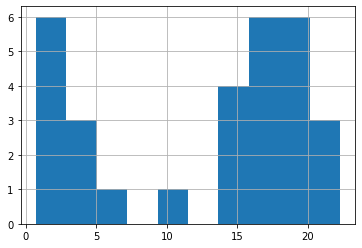

In [42]:
goal_df.value.hist()
goal_df.sort_values('value',ascending=False).head(10)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,points_per_game,value_season,chance_of_playing_this_round,chance_of_playing_next_round,transfers_in_event,transfers_out_event,news,news_added,influence,influence_rank,creativity,creativity_rank,threat,threat_rank,ict_index,ict_index_rank,status,total_points,position,overall_strength_home,overall_strength_away,strength_atk_home,strength_atk_away,strength_def_home,strength_def_away,file_date,total_time_played,value
529,Kieran,Trippier,Newcastle,2,63.6,60,2017,6571920,6.3,24.3,100.0,100.0,16092,8781,,2022-08-30T14:30:06.751009Z,591.4,14,1185.4,1,81.0,237,186.0,10,a,146,Defender,1210,1260,1250,1300,1165,1220,2023-02-27,97.439614,24.3
7,Benjamin,White,Arsenal,2,12.8,47,1858,2101905,4.0,20.6,NaN,NaN,3549,4979,,None,363.2,94,305.2,62,61.0,276,72.9,116,a,97,Defender,1245,1285,1250,1250,1240,1320,2023-02-27,89.758454,20.6
530,Dan,Burn,Newcastle,2,3.3,45,1944,626868,4.0,20.4,NaN,NaN,2912,3029,,None,334.4,115,143.2,165,164.0,153,64.3,138,a,92,Defender,1210,1260,1250,1300,1165,1220,2023-02-27,93.913043,20.4
538,Fabian,Schär,Newcastle,2,14.5,51,1964,3066995,4.6,20.0,100.0,100.0,9483,9971,,2022-10-30T00:00:07.327726Z,425.2,61,157.7,151,350.0,59,93.5,72,a,102,Defender,1210,1260,1250,1300,1165,1220,2023-02-27,94.879227,20.0
549,Sven,Botman,Newcastle,2,4.5,45,1777,932660,4.2,19.8,NaN,NaN,2131,3734,,None,349.8,98,85.4,230,187.0,138,62.5,146,a,89,Defender,1210,1260,1250,1300,1165,1220,2023-02-27,85.845411,19.8
13,Gabriel,dos Santos Magalhães,Arsenal,2,13.6,52,2160,2085049,4.2,19.4,NaN,NaN,5716,4341,,None,492.2,39,66.0,263,266.0,86,82.5,92,a,101,Defender,1245,1285,1250,1250,1240,1320,2023-02-27,104.347826,19.4
21,William,Saliba,Arsenal,2,34.4,53,2145,5319971,4.3,19.4,NaN,NaN,8997,10047,,None,461.0,50,70.5,254,105.0,206,63.8,141,a,103,Defender,1245,1285,1250,1250,1240,1320,2023-02-27,103.623188,19.4
140,Ben,Mee,Brentford,2,12.3,50,1928,2225446,4.3,19.0,NaN,NaN,34387,4526,,None,484.8,41,35.4,343,183.0,140,70.5,122,a,95,Defender,1115,1180,1100,1160,1130,1200,2023-02-27,93.140097,19.0
307,Tim,Ream,Fulham,2,3.6,46,2247,529328,3.4,18.7,NaN,NaN,4082,7584,,None,484.4,42,33.7,347,72.0,252,59.3,160,a,86,Defender,1095,1100,1070,1065,1120,1140,2023-02-27,108.550725,18.7
352,Timothy,Castagne,Leicester,2,6.5,44,1995,1811443,3.4,17.7,100.0,100.0,2501,5719,,2022-10-08T18:00:06.881764Z,435.8,54,260.3,89,208.0,123,90.8,76,a,78,Defender,1130,1115,1065,1110,1200,1120,2023-02-27,96.376812,17.7


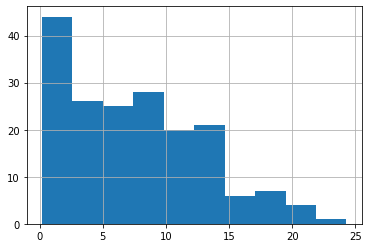

In [43]:
def_df.value.hist()
def_df.sort_values('value',ascending=False).head(10)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,points_per_game,value_season,chance_of_playing_this_round,chance_of_playing_next_round,transfers_in_event,transfers_out_event,news,news_added,influence,influence_rank,creativity,creativity_rank,threat,threat_rank,ict_index,ict_index_rank,status,total_points,position,overall_strength_home,overall_strength_away,strength_atk_home,strength_atk_away,strength_def_home,strength_def_away,file_date,total_time_played,value
541,Miguel,Almirón Rejala,Newcastle,3,24.3,55,1879,5636773,5.4,22.7,100.0,100.0,16088,15598,,2023-02-11T22:00:09.655794Z,512.6,29,284.1,74,701.0,15,150.0,24,a,125,Midfielder,1210,1260,1250,1300,1165,1220,2023-02-27,90.772947,22.7
494,Marcus,Rashford,Man Utd,3,51.6,72,1954,7812226,6.3,21.0,100.0,100.0,64021,3198,,2022-09-15T22:00:06.254533Z,660.0,7,292.4,68,973.0,5,192.7,9,a,151,Midfielder,1155,1220,1140,1220,1165,1220,2023-02-27,94.396135,21.0
155,Solly,March,Brighton,3,5.7,51,1900,1200231,4.8,20.6,NaN,NaN,28338,4908,,None,505.6,34,549.9,14,648.0,17,170.4,12,a,105,Midfielder,1170,1175,1140,1150,1200,1200,2023-02-27,91.787440,20.6
328,Andreas,Hoelgebaum Pereira,Fulham,3,18.5,44,2079,2996029,3.6,20.5,100.0,100.0,3047,12017,,2022-08-14T00:00:05.954103Z,342.4,108,844.2,4,320.0,69,150.5,23,a,90,Midfielder,1095,1100,1070,1065,1120,1140,2023-02-27,100.434783,20.5
15,Gabriel,Martinelli Silva,Arsenal,3,33.7,65,1915,5793409,5.2,19.1,NaN,NaN,15083,10813,,None,498.8,36,547.2,16,891.0,6,193.6,8,a,124,Midfielder,1245,1285,1250,1250,1240,1320,2023-02-27,92.512077,19.1
4,Martin,Ødegaard,Arsenal,3,38.5,70,1951,5310037,5.8,19.1,100.0,100.0,11750,18500,,2022-09-18T20:00:06.315087Z,579.8,16,781.5,6,608.0,21,197.1,7,a,134,Midfielder,1245,1285,1250,1250,1240,1320,2023-02-27,94.251208,19.1
0,Granit,Xhaka,Arsenal,3,2.8,49,2036,842267,3.8,18.4,NaN,NaN,531,2151,,None,443.2,52,518.5,19,340.0,64,130.3,30,a,90,Midfielder,1245,1285,1250,1250,1240,1320,2023-02-27,98.357488,18.4
153,Pascal,Groß,Brighton,3,9.4,54,1912,4049058,4.4,18.0,NaN,NaN,3112,5326,,None,512.6,28,688.1,9,354.0,58,155.5,17,a,97,Midfielder,1170,1175,1140,1150,1200,1200,2023-02-27,92.367150,18.0
49,Leon,Bailey,Aston Villa,3,3.7,44,1458,1021818,3.3,17.5,100.0,100.0,1383,2504,,2022-10-06T13:30:06.901968Z,271.6,164,301.0,64,442.0,41,101.3,62,a,77,Midfielder,1070,1100,1070,1075,1070,1130,2023-02-27,70.434783,17.5
651,Pierre-Emile,Højbjerg,Spurs,3,2.4,55,2141,732753,3.9,17.1,100.0,100.0,1742,2230,,2022-10-23T21:00:08.232518Z,578.8,17,345.3,53,197.0,134,112.2,48,a,94,Midfielder,1155,1220,1140,1210,1170,1230,2023-02-27,103.429952,17.1


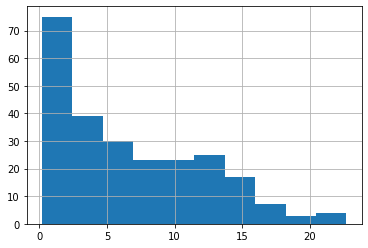

In [44]:
mid_df.value.hist()
mid_df.sort_values('value',ascending=False).head(10)

In [45]:
events_df.head()

,id,name,deadline_time,average_entry_score,finished,data_checked,highest_scoring_entry,deadline_time_epoch,deadline_time_game_offset,highest_score,is_previous,is_current,is_next,cup_leagues_created,h2h_ko_matches_created,chip_plays,most_selected,most_transferred_in,top_element,top_element_info,transfers_made,most_captained,most_vice_captained
0,1,Gameweek 1,2022-08-05T17:30:00Z,57,True,True,7309963.0,1659720600,0,119.0,False,False,False,False,False,"[{'chip_name': 'bboost', 'num_played': 170273}...",28.0,105.0,366.0,"{'id': 366, 'points': 15}",0,283.0,318.0
1,2,Gameweek 2,2022-08-13T10:00:00Z,57,True,True,3977474.0,1660384800,0,139.0,False,False,False,False,False,"[{'chip_name': 'bboost', 'num_played': 136909}...",28.0,318.0,28.0,"{'id': 28, 'points': 19}",12847501,318.0,283.0
2,3,Gameweek 3,2022-08-20T10:00:00Z,48,True,True,9105261.0,1660989600,0,118.0,False,False,False,False,False,"[{'chip_name': 'bboost', 'num_played': 118152}...",28.0,19.0,7.0,"{'id': 7, 'points': 16}",20175060,28.0,318.0
3,4,Gameweek 4,2022-08-27T10:00:00Z,62,True,True,9406675.0,1661594400,0,149.0,False,False,False,False,False,"[{'chip_name': 'bboost', 'num_played': 145393}...",28.0,225.0,279.0,"{'id': 279, 'points': 22}",16105042,283.0,28.0
4,5,Gameweek 5,2022-08-30T17:00:00Z,62,True,True,2109803.0,1661878800,0,124.0,False,False,False,False,False,"[{'chip_name': 'bboost', 'num_played': 92307},...",28.0,104.0,318.0,"{'id': 318, 'points': 17}",14741619,318.0,28.0


In [46]:
slim_elements_df.to_csv('~/Desktop/fpl_data.csv')
# teams_df.to_csv('~/Desktop/fpl_team_data.csv')